# Advanced EDA

Now that we have completed the preprocessing of the data, we can analyze the relationships between the numeric variables and our target variable, which in this case is ratings. Additionally, we can examine the relationships among the dependent variables. This exploration helps us gain a deeper understanding of the data before proceeding to modeling.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/PostBooksEDA.csv', index_col=0)
df_encoded = pd.read_csv('../data/PostEncodedBooksEDA.csv', index_col=0)

## Correlations

One of the key aspects that provide valuable insights, especially for logistic models, is examining correlations. Therefore, we will analyze our encoded dataframe to identify which variables might interfere with one another.

In [3]:
X = df_encoded.drop('rating', axis=1)
y = df_encoded['rating'].copy()

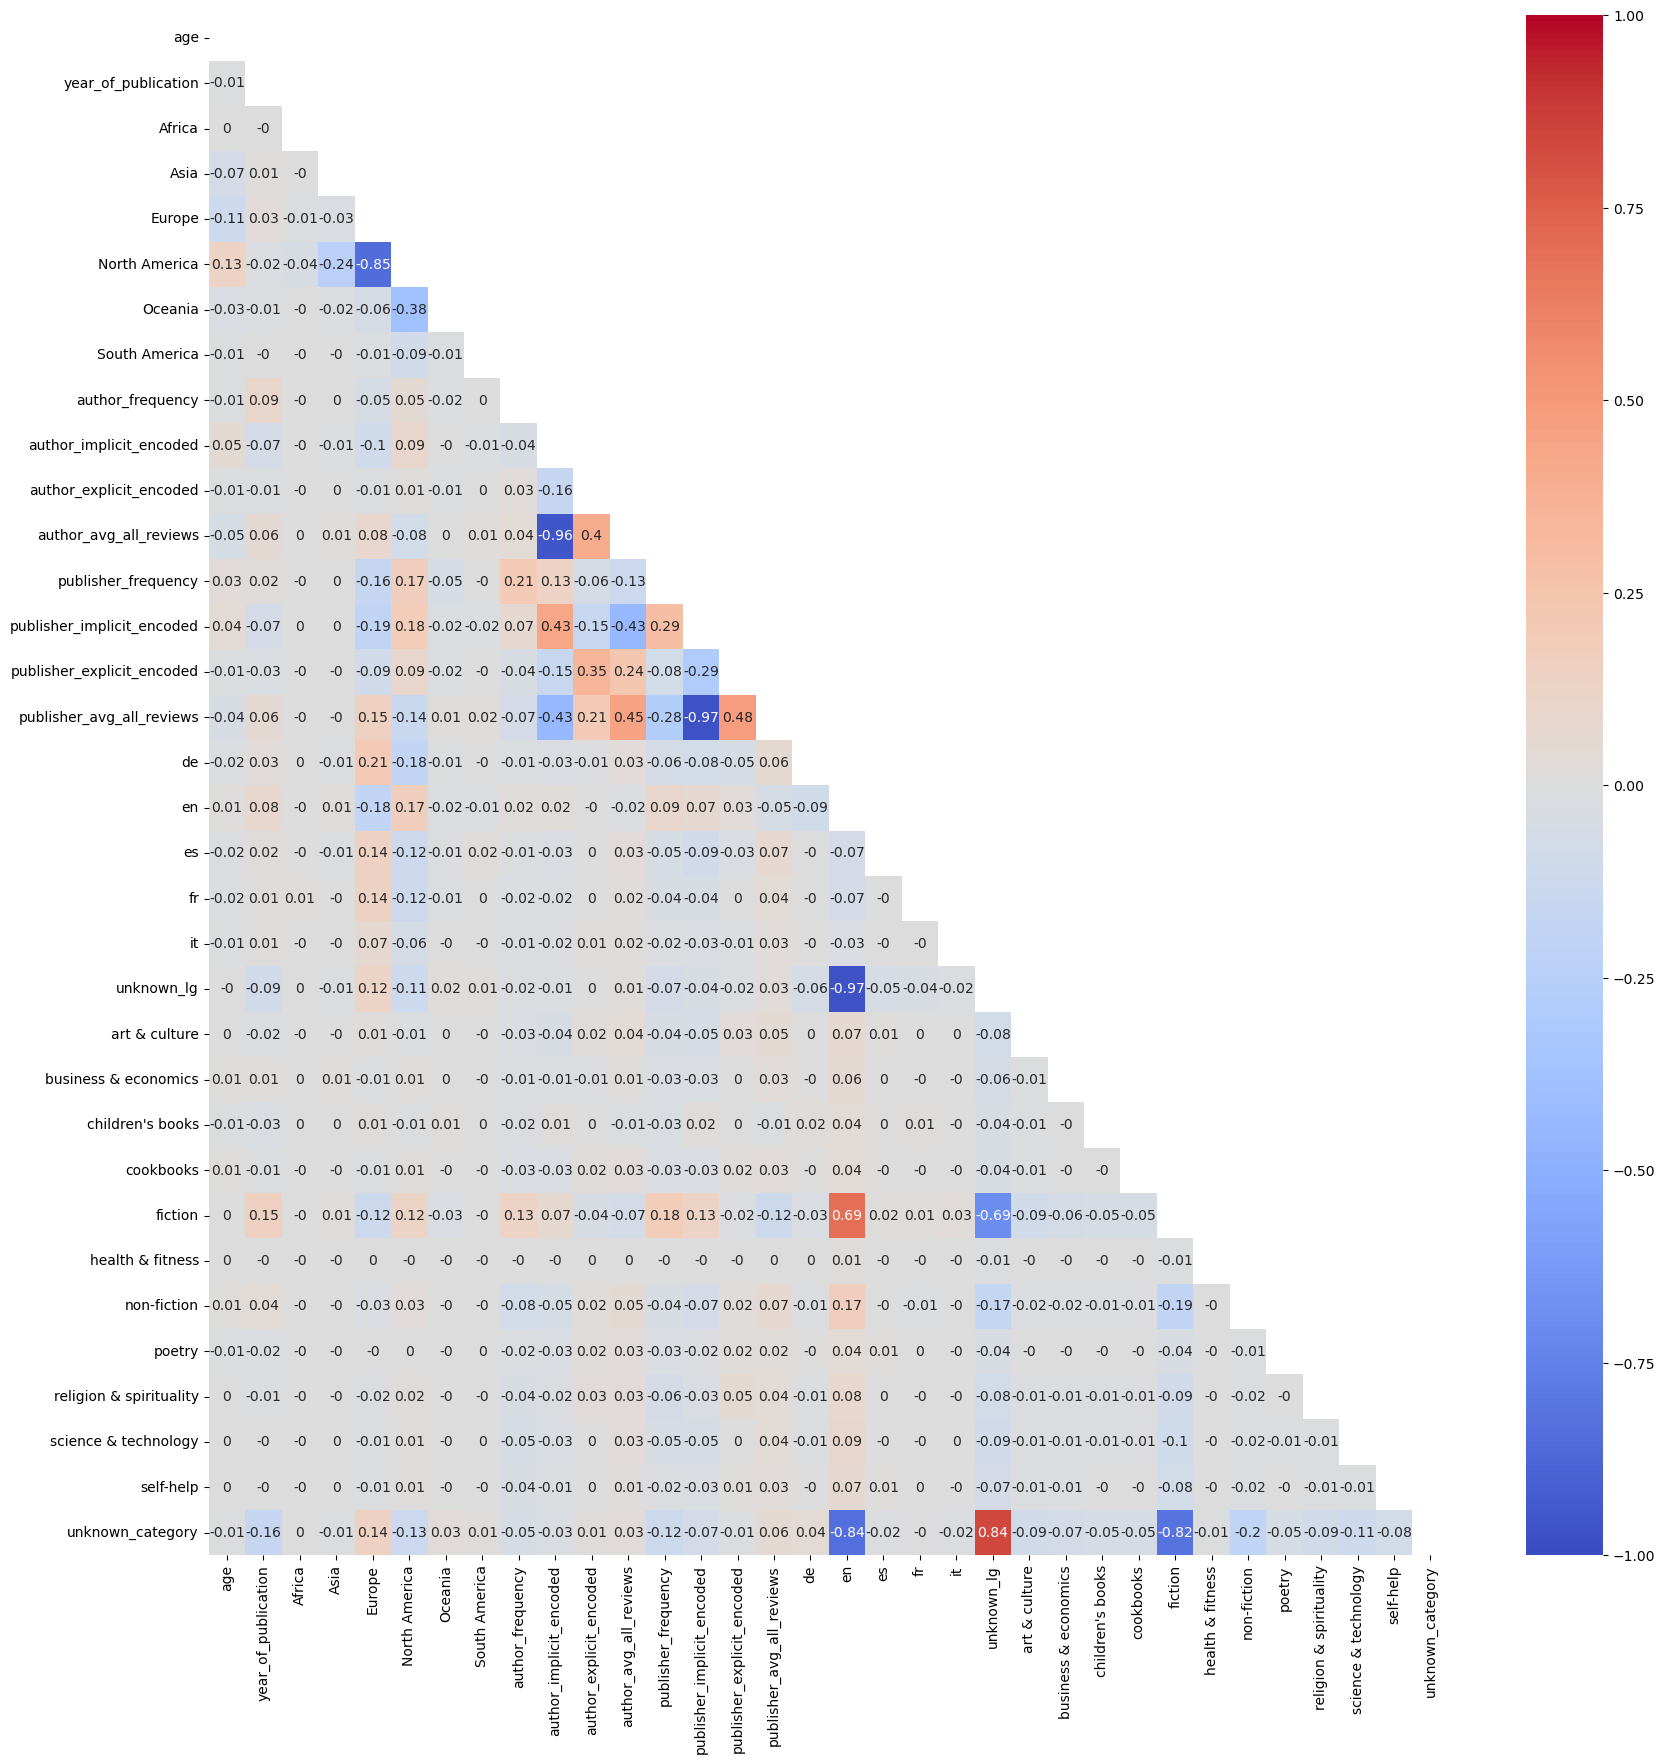

In [4]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper triangular
mask = np.triu(corr_df)

# Visualize 
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

We observe similar correlations between the columns encoded using frequency and mean encoding. This is expected, as the primary goal was to provide as much contextual value as possible to these columns. However, given the high correlations, it might be practical to drop one of these columns before modeling.

We also observe a high correlation between the unkown values in the language and book category columns. This occurs because most of the values in the dataset are unknown. Dropping the unkown columns could help models uncover better relationships among the less common variables.

North America, being the leading category among continents, shows some correlation with other continent values. Dropping one of these continents could improve the model's performance.

Summary: For Logistic models, drop Europe, Unkown_lg and Unkown_Category, and avg of all reviews.

## Relationship between the data

### Distribution of the numerical data

In [5]:
X.columns

Index(['age', 'year_of_publication', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America', 'author_frequency',
       'author_implicit_encoded', 'author_explicit_encoded',
       'author_avg_all_reviews', 'publisher_frequency',
       'publisher_implicit_encoded', 'publisher_explicit_encoded',
       'publisher_avg_all_reviews', 'de', 'en', 'es', 'fr', 'it', 'unknown_lg',
       'art & culture', 'business & economics', 'children's books',
       'cookbooks', 'fiction', 'health & fitness', 'non-fiction', 'poetry',
       'religion & spirituality', 'science & technology', 'self-help',
       'unknown_category'],
      dtype='object')

In [6]:
X_numerical = X[['age', 'year_of_publication', 'author_frequency', 'author_implicit_encoded',
 'author_explicit_encoded', 'author_avg_all_reviews', 'publisher_frequency',
 'publisher_implicit_encoded', 'publisher_explicit_encoded', 'publisher_avg_all_reviews']]

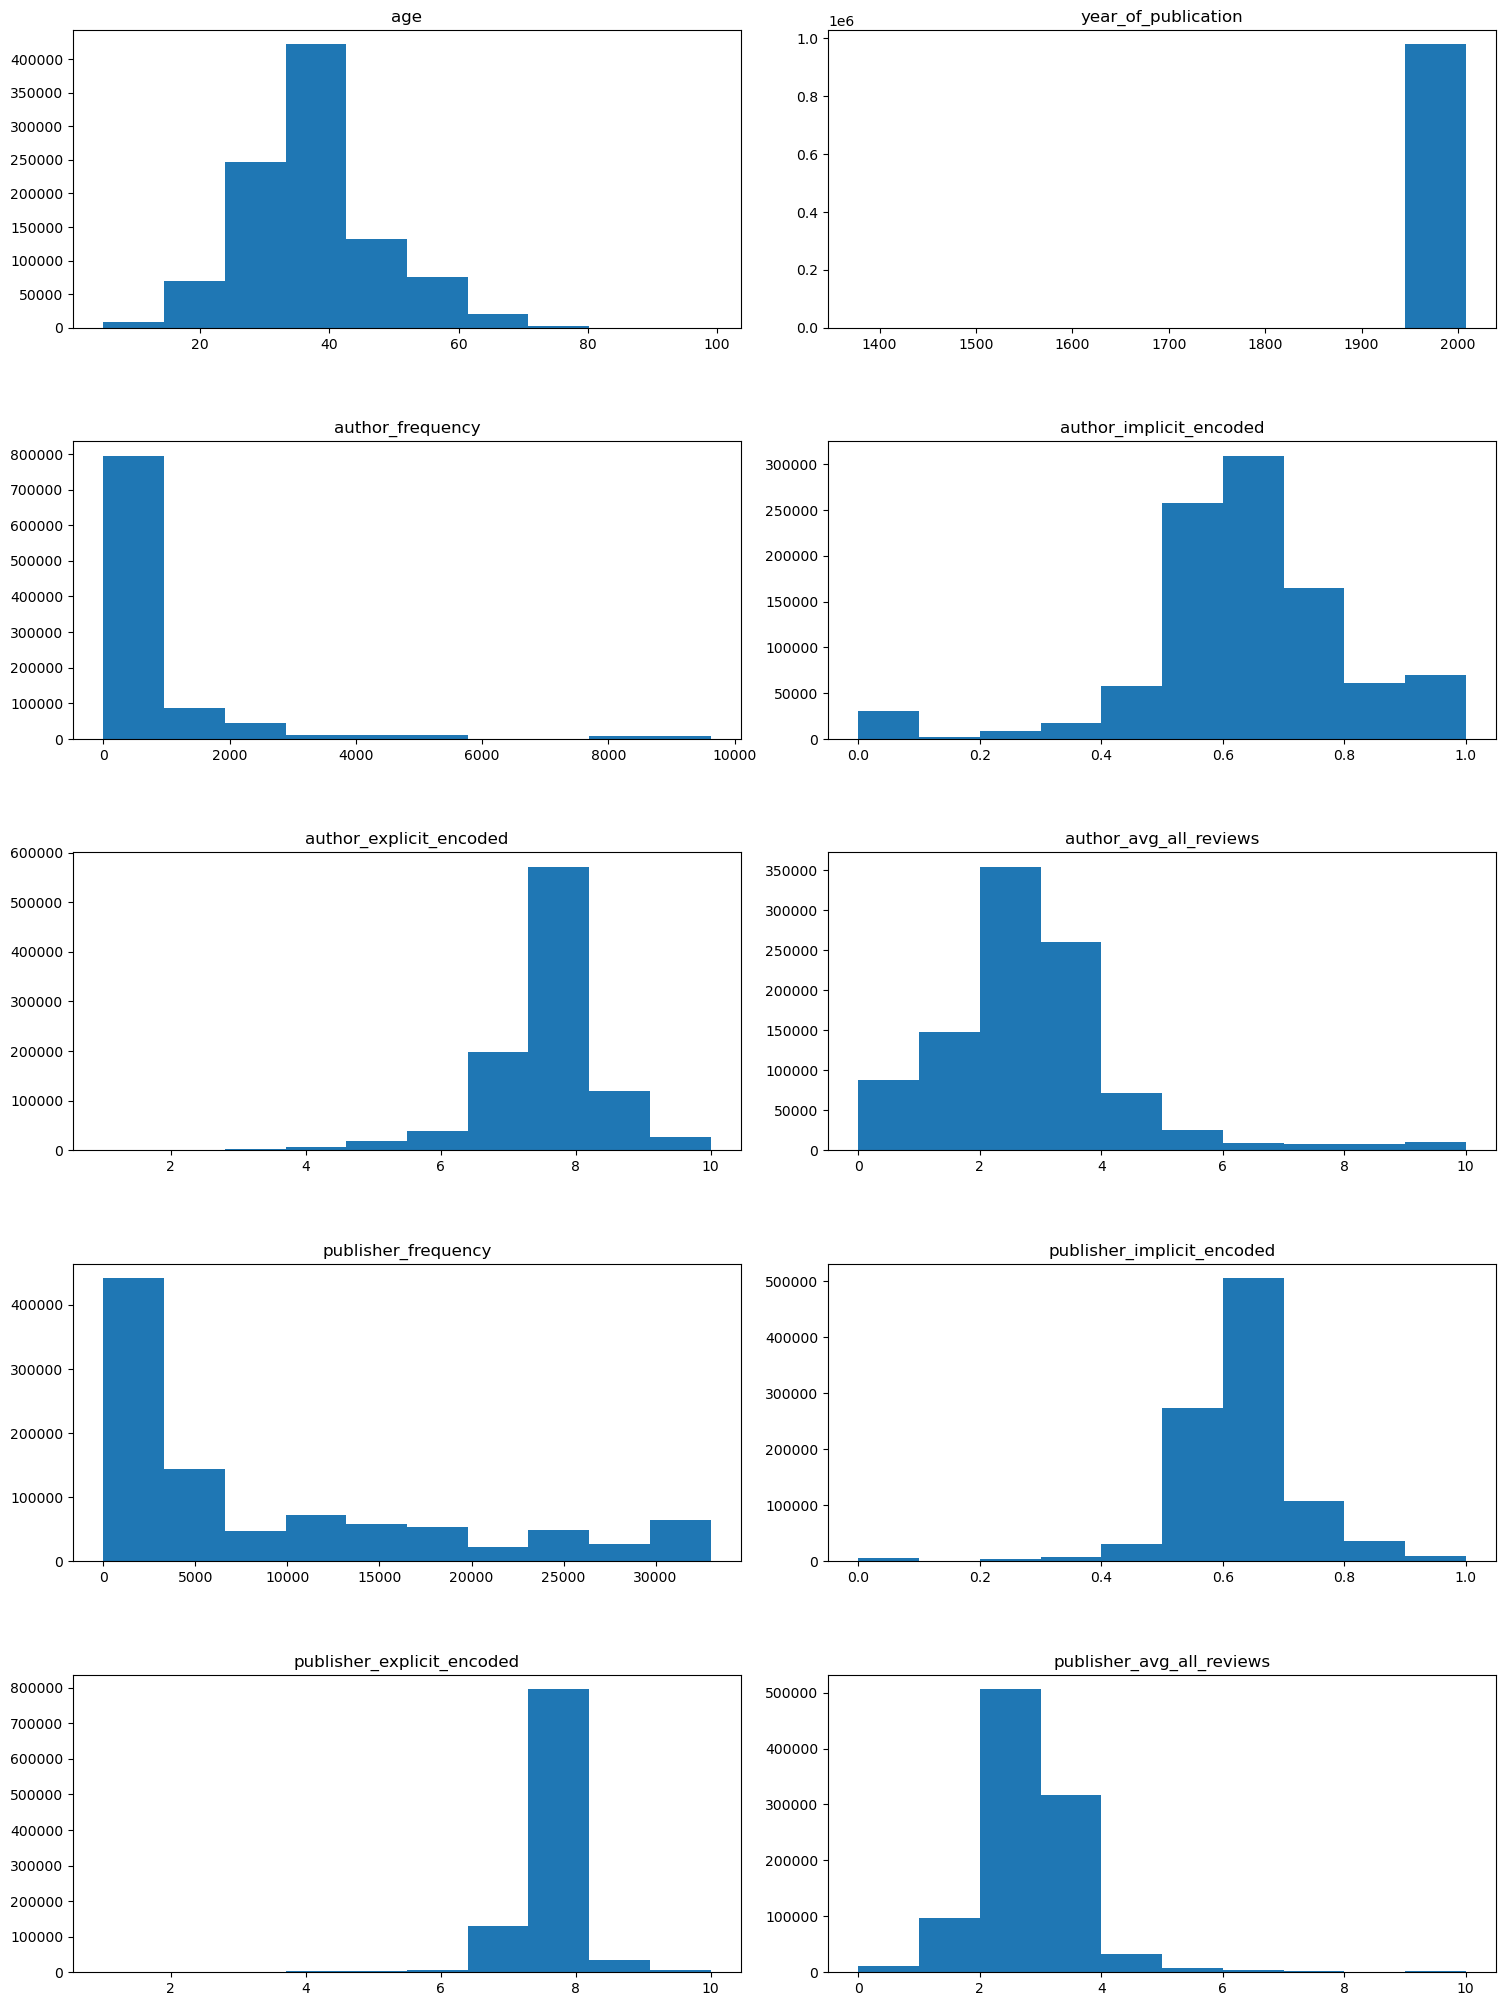

In [7]:
plt.subplots(5, 2, figsize=(15, 20))

# Plotting
for i, column in enumerate(X_numerical.columns, 1):
    plt.subplot(5,2, i)
    plt.hist(X_numerical[column])
    plt.title(column)
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

The majority of readers fall between the ages of 20 and 50, with a peak in the 30–40 range, while book publications are heavily concentrated post-1900, particularly around the year 2000.

Both author and publisher frequencies exhibit strong right skewness, indicating that a small number of contributors dominate the dataset, whereas the majority have limited representation

Encoded variables for authors and publishers, both implicit and explicit, are centered but lean towards higher values, suggesting consistent scoring patterns. Interestingly, the average reviews per author and publisher remain low, with most clustered below two.

These trends point to a dataset dominated by modern publications and a mix of high-frequency contributors and less-recognized entities

## Categorical data relationship with Target variable

In [8]:
X_categorical = X.drop(columns=['age', 'year_of_publication', 'author_frequency', 'author_implicit_encoded',
 'author_explicit_encoded', 'author_avg_all_reviews', 'publisher_frequency',
 'publisher_implicit_encoded', 'publisher_explicit_encoded', 'publisher_avg_all_reviews'], axis=1)

In [9]:
X_categorical

,Africa,Asia,Europe,North America,Oceania,South America,de,en,es,fr,...,children's books,cookbooks,fiction,health & fitness,non-fiction,poetry,religion & spirituality,science & technology,self-help,unknown_category
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1031171,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1031172,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1031173,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


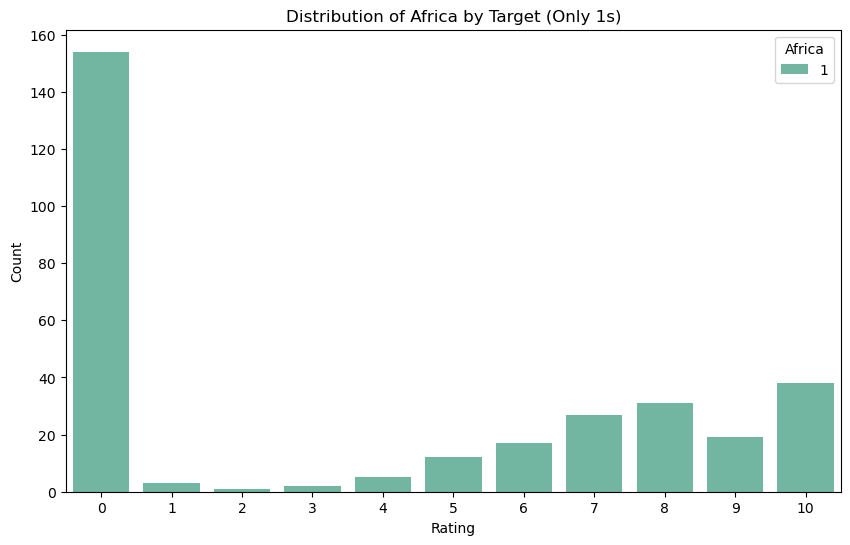

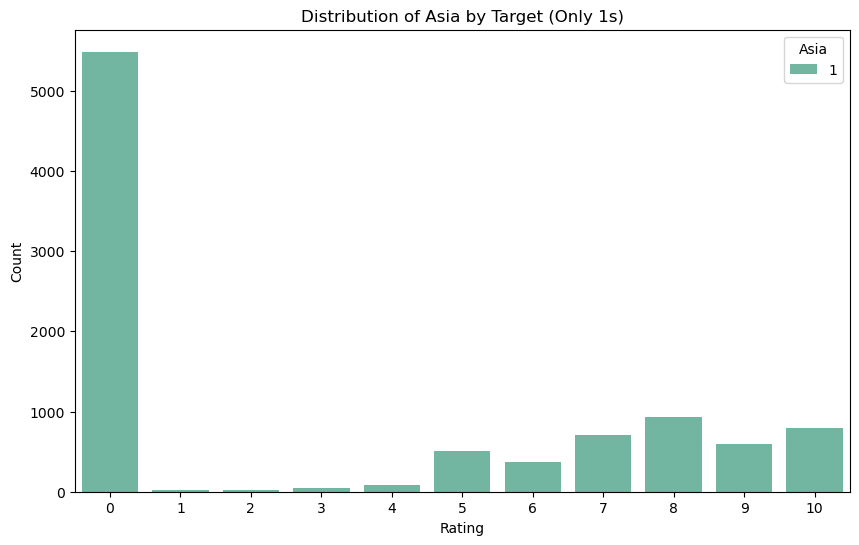

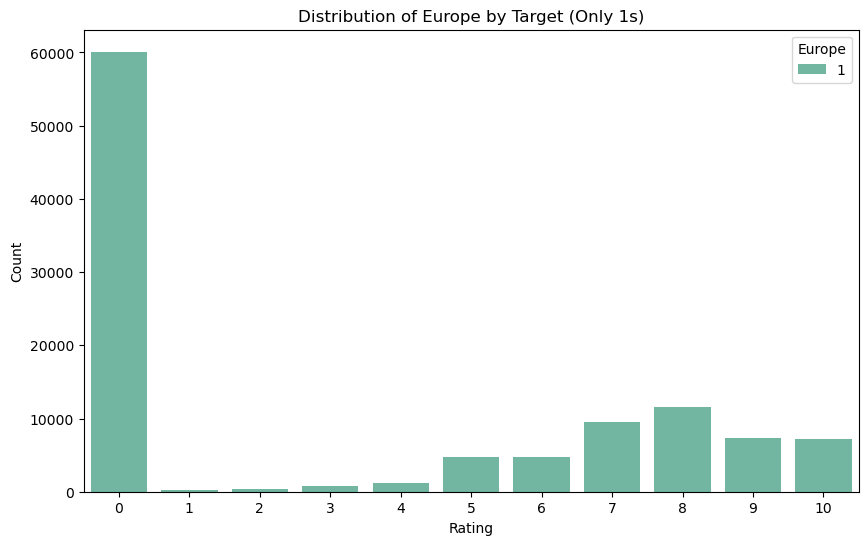

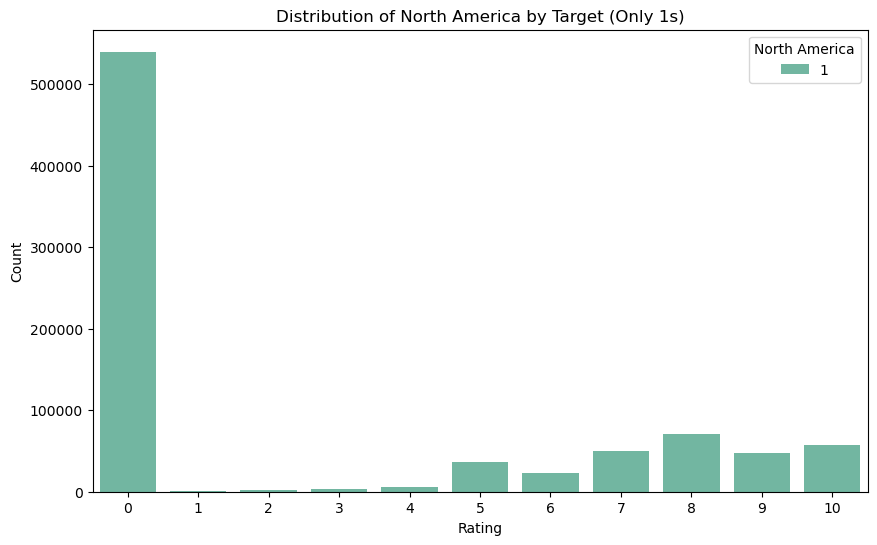

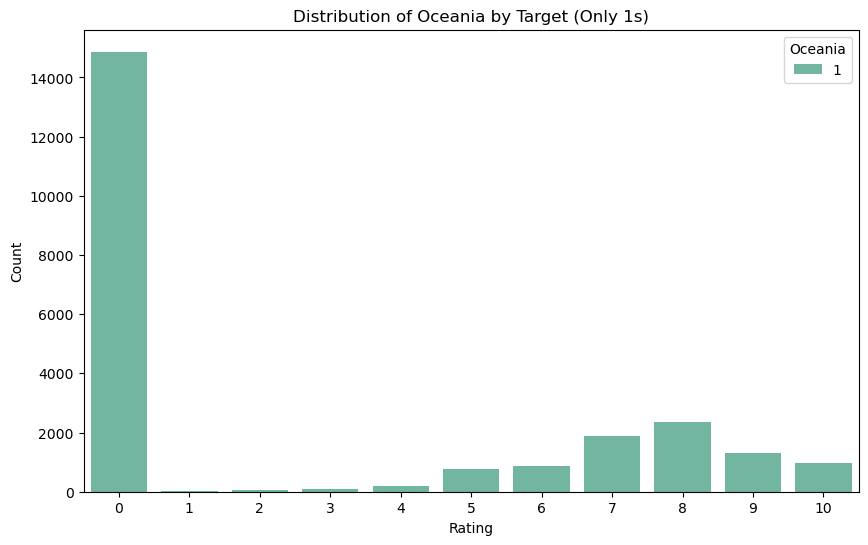

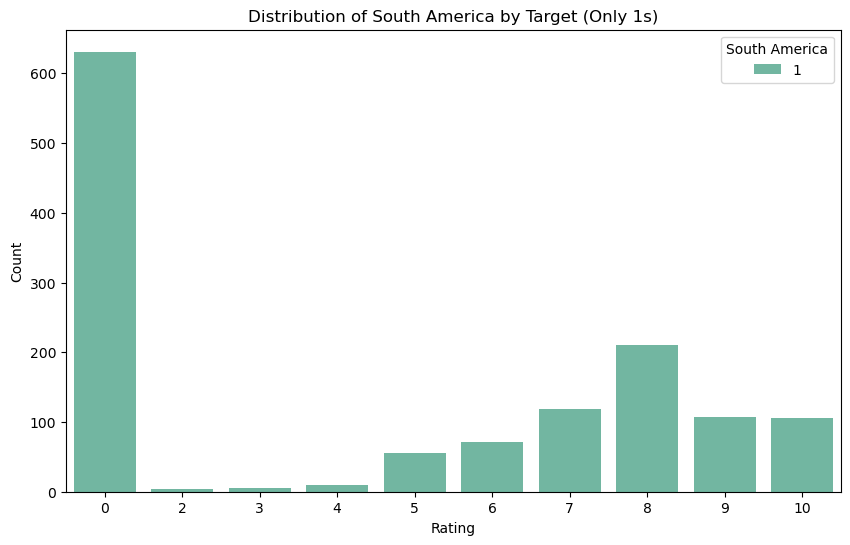

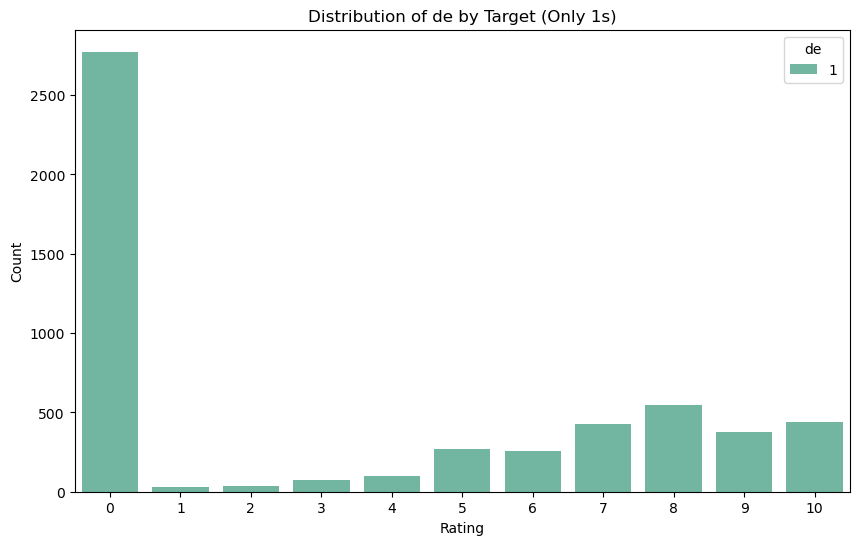

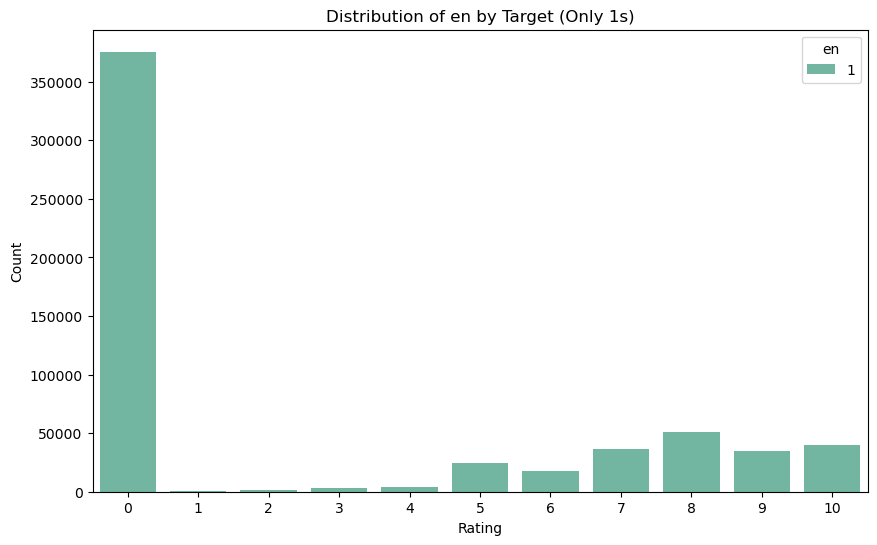

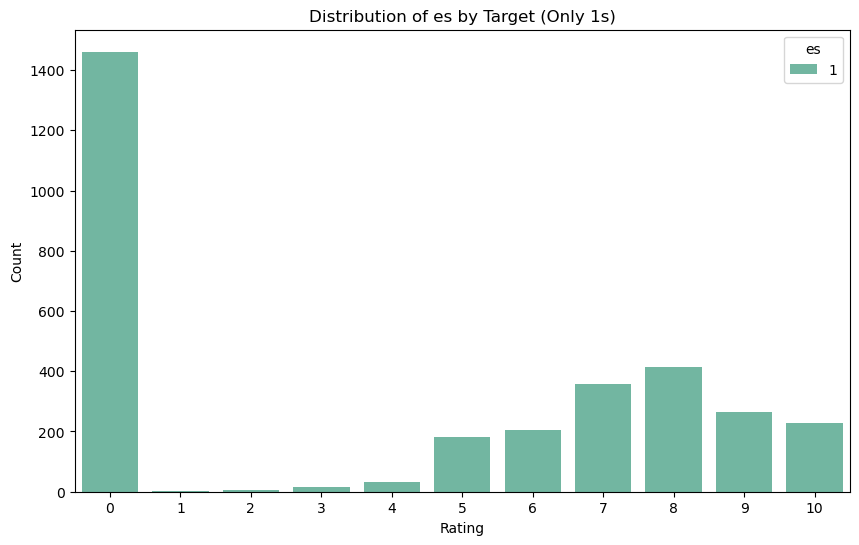

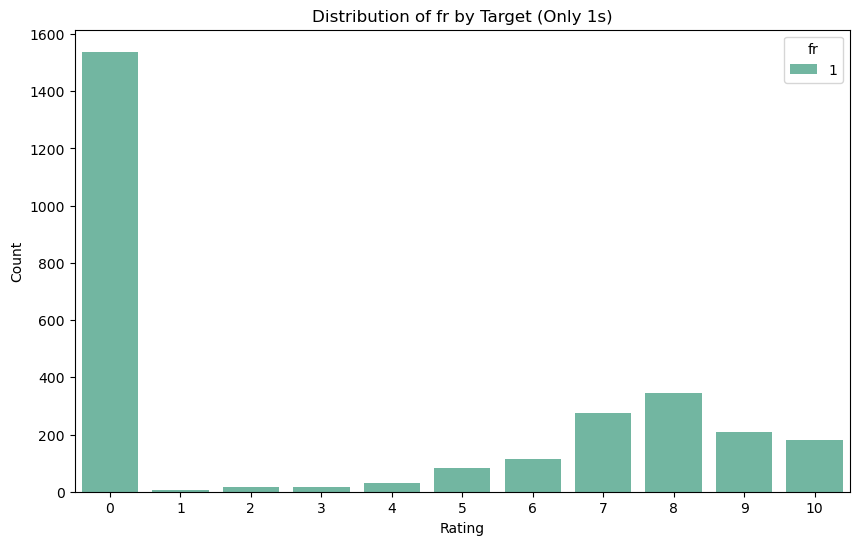

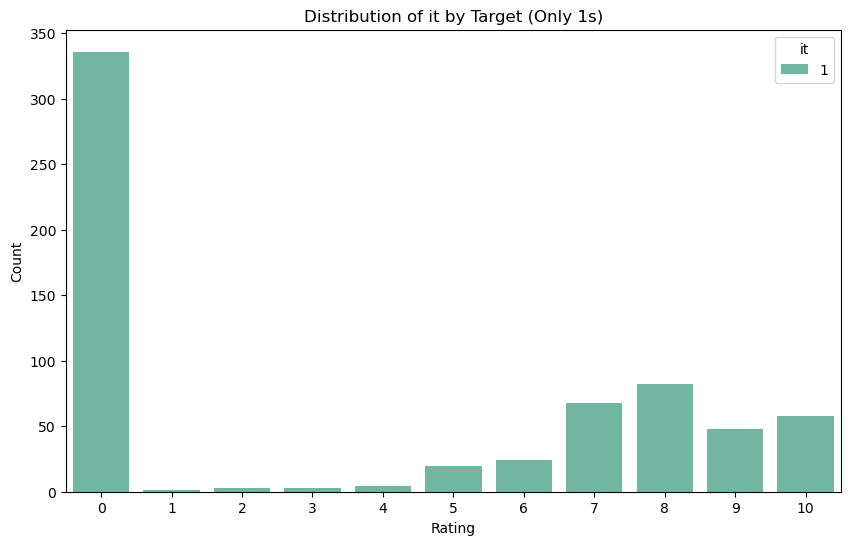

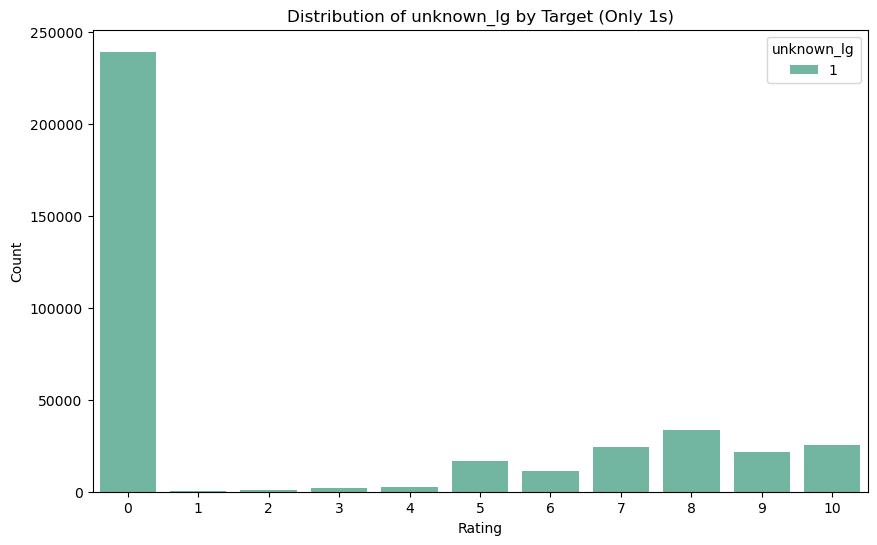

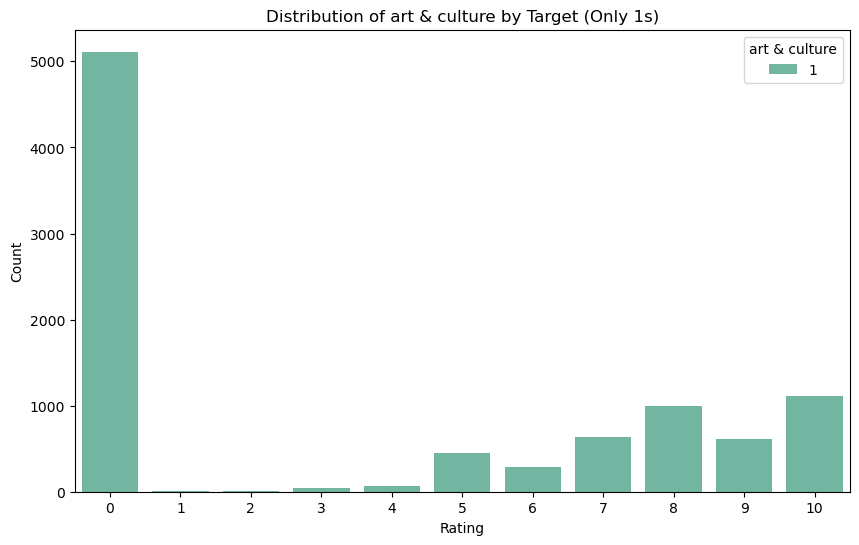

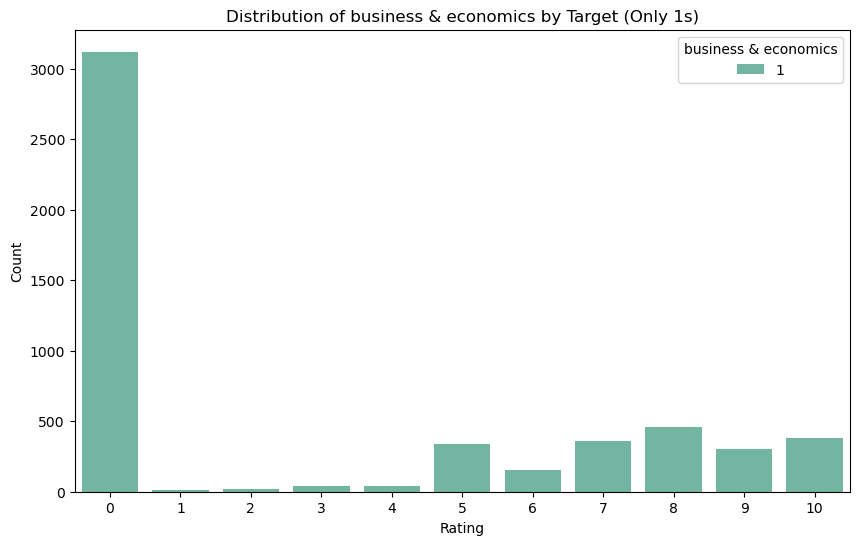

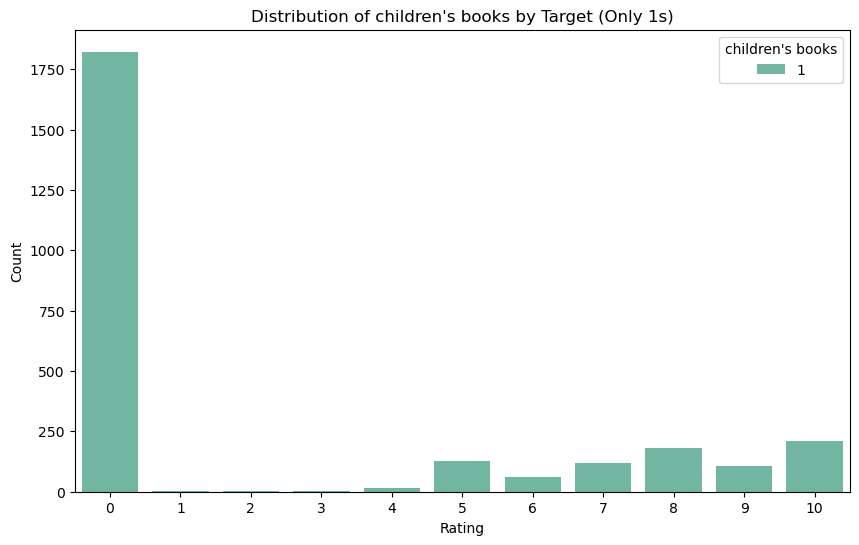

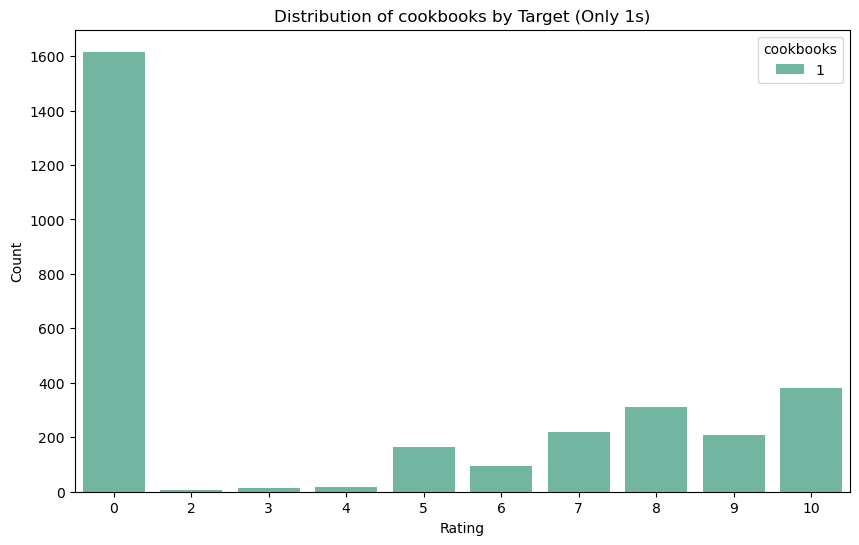

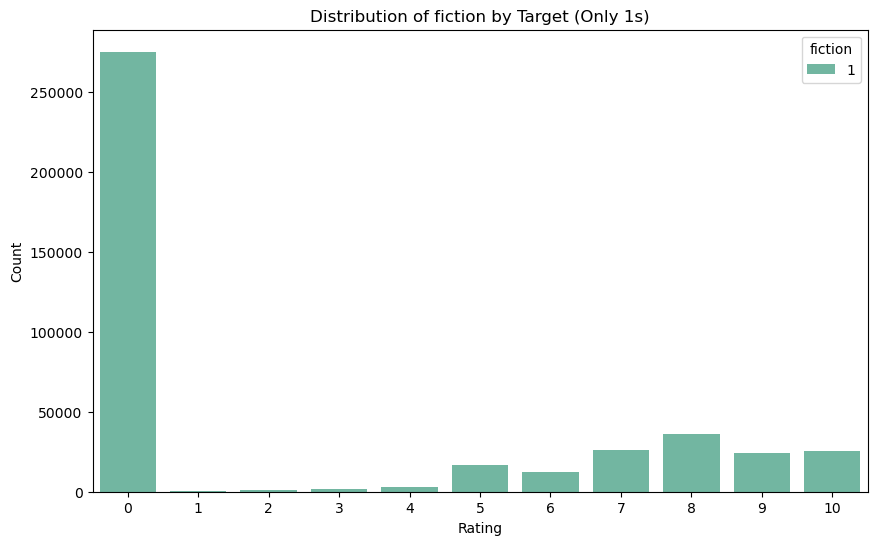

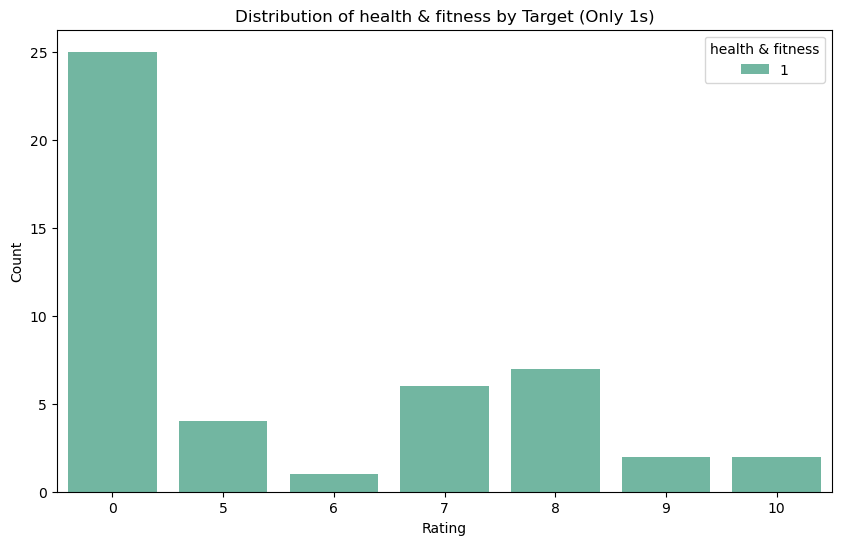

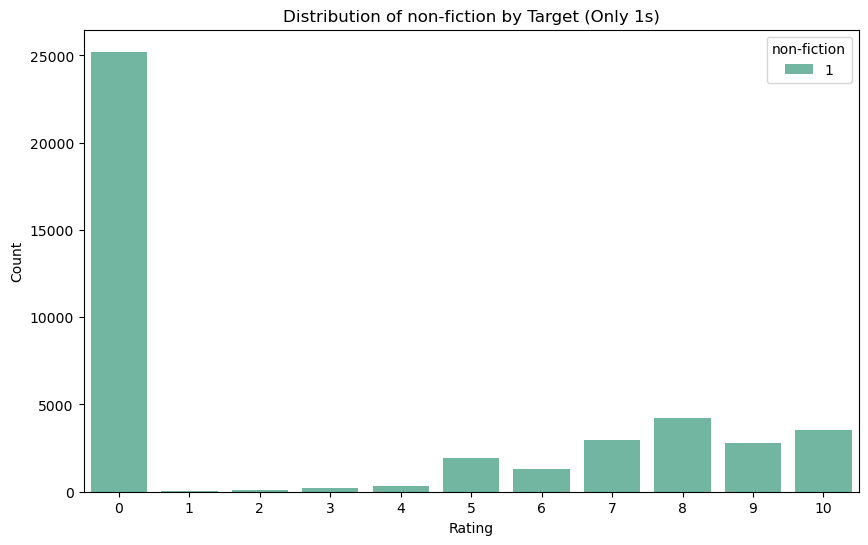

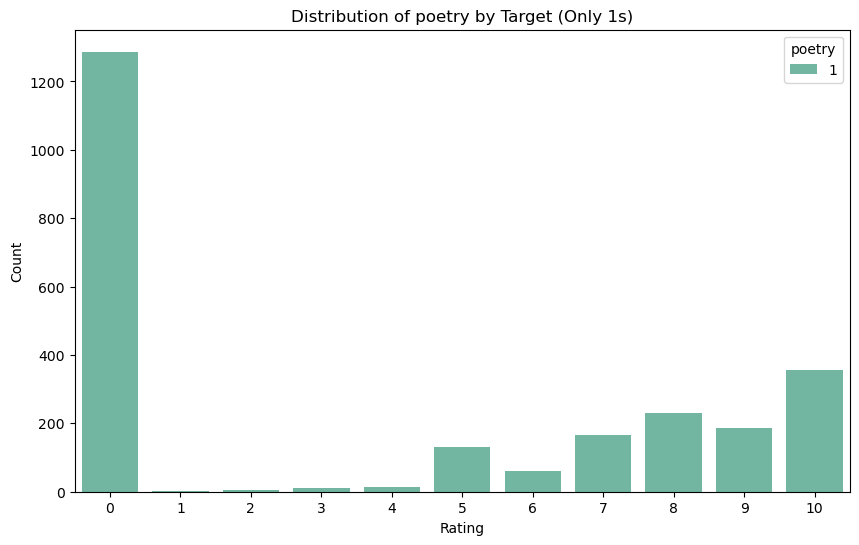

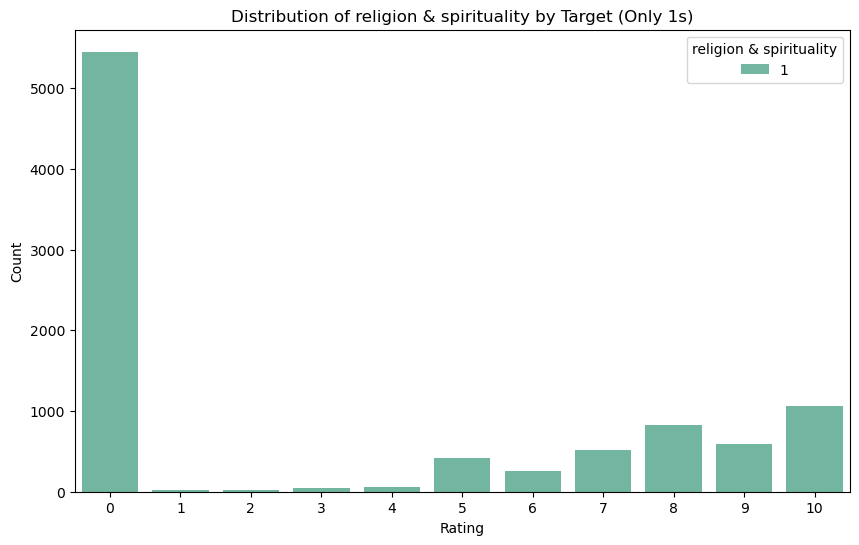

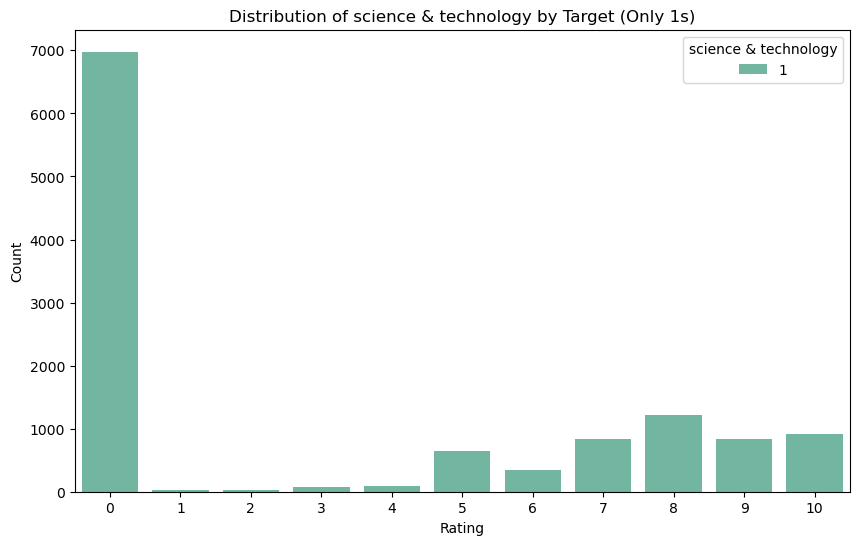

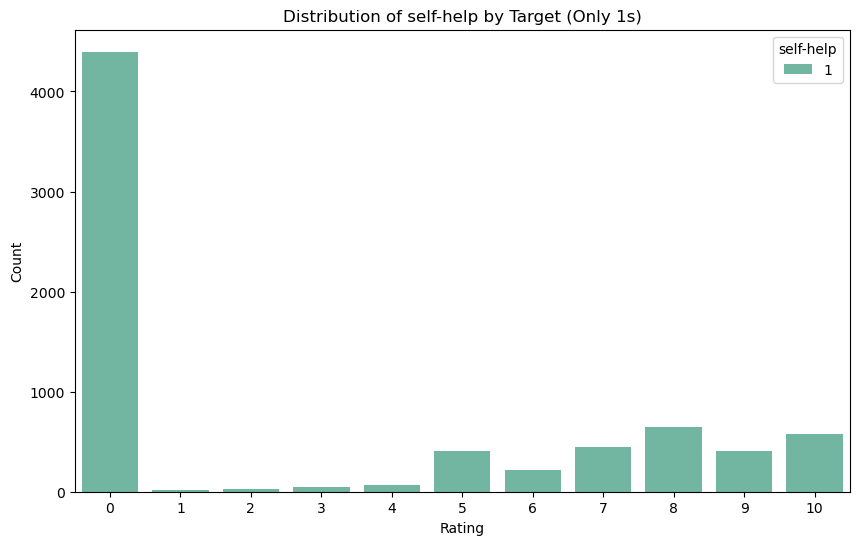

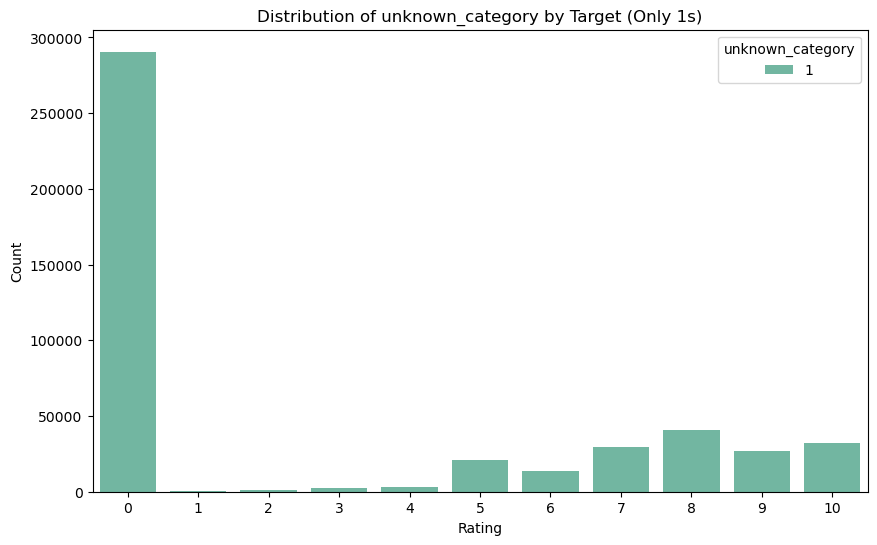

In [10]:
for col in X_categorical.columns:
    plt.figure(figsize=(10, 6))
    
    # Create a dataframe for the categorical column and the target
    data = X_categorical.assign(y=y)
    
    # Filter data where the column value is 1
    filtered_data = data[data[col] == 1]
    
    # Grouped bar plot with target on the x-axis
    grouped_data = filtered_data.groupby(['y', col]).size().reset_index(name='count')
    sns.barplot(data=grouped_data, x='y', y='count', hue=col, palette='Set2')

    # Add plot title and labels
    plt.title(f"Distribution of {col} by Target (Only 1s)")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.legend(title=col, loc='upper right')
    plt.show()

## Insights

### Continent

Books from North America and Europe overwhelmingly dominate the dataset in representation, with North America having the highest count of 0 target values. However, both continents display consistent increases in higher target ratings (7–10), affirming their substantial contributions to top-rated books. Ohter continents show similar patterns, with a smaller presence overall but a notable contribution to higher target values, reflecting niche but impactful content from these regions.

### Language

English books show a consistent rise in ratings for higher target values (7–10), indicating strong contributions to top-rated books. Other languages like German (de), Spanish (es), French (fr), and Italian (it) have smaller overall representations but follow a similar trend, with a steady increase in higher target values.

The unknown language category (unknown_lg) also exhibits a significant count of 0 values but performs well in higher targets, emphasizing that unclassified language books can still resonate positively with audiences.

### Book Categories

The fiction category stands out as the most dominant, with a large number of books at 0 target values but a steady and consistent rise in ratings for higher targets (7–10), showcasing its widespread appeal and consistent high ratings.

Niche categories like children’s books, cookbooks, poetry, religion & spirituality, and science & technology also show smaller overall engagement but have significant positive ratings in the higher target range, reflecting their strong appeal to their audiences.

The unknown category, despite its broad representation and many 0 values, demonstrates diversity and quality in higher ratings, suggesting unclassified books can perform well with audiences on this dataset.

## Overall Patterns

The data reveals consistent patterns across languages, continents, and book categories. Most distributions are dominated by books with 0 target values, indicating lower overall engagement for a significant portion of the dataset. However, there is a clear and steady rise in ratings for higher target values (7–10) across all groups. This suggests that while many books may not be widely interacted with, those that do receive ratings tend to perform well, highlighting their appeal to niche or specific audiences.

## Insights for modeling

Most groups have a significant number of books with 0 rating. This indicates class imbalance, which could affect model performance. 

The data’s imbalance, skewness, and group-specific trends needs a modeling approach that balances the dominance of the majority class (0 ratings) with the importance of high ratings (7–10). 

## Insights for Business

North America and Europe dominate the dataset in terms of representation, highlighting these as primary markets for books.

Books in languages like Spanish, German, and French exhibit high-quality performance, indicating opportunities to diversify offerings in these languages.

Fiction is the most dominant category, showcasing widespread appeal and consistent high ratings. Businesses should prioritize fiction in their inventory and promotions to meet broad audience demand. However, niche categories such as self-help, science & technology, and poetry, while smaller in volume, show significant positive ratings in higher target ranges.

The `unknown_category` and `unknown_lg` groups demonstrate diversity and notable performance in higher ratings, despite their unclassified nature. Businesses can explore better metadata tagging for these groups to uncover hidden value and refine their categorization processes to target these potential high-performing books more effective

Since higher ratings correlate with increased engagement, businesses should encourage reviews and ratings for their books. Furhtermore, the large number of books with 0 target values indicates potential underperformance or a lack of audience interaction. Businesses should analyze these segments further to identify whether the issue is content relevance, marketing strategy, or discoverability, and develop targeted interventions to improve engagement.